# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
df <- read_csv('merged_data.csv', show_col_types = FALSE)
df %>% head(4)
sapply(df, class)

                GEOID                  NAME                   moe 
            "numeric"           "character"             "numeric" 
           population            white_race            black_race 
            "numeric"             "numeric"             "numeric" 
           asian_race                  kids           school_kids 
            "numeric"             "numeric"             "numeric" 
   male_public_school   male_private_school  female_public_school 
            "numeric"             "numeric"             "numeric" 
female_private_school               med_inc   total_public_school 
            "numeric"             "numeric"             "numeric" 
 total_private_school               Borough       Community.Board 
            "numeric"           "character"             "numeric" 
          School.Type      School.Name...ID               Address 
          "character"           "character"           "character" 
             Postcode              Latitude             Longit

## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [13]:
%%R 

# code for summary statistics
# group by and summarize for School.Type of Public and Private
# Load the dplyr package
library(dplyr)

# Ensure unique School.Name...ID is counted within each School.Type category
school_counts <- df %>%
  filter(!is.na(School.Type)) %>%  # Remove rows where 'School.Type' is NA
  distinct(School.Name...ID, School.Type) %>%  # Ensure unique schools are considered
  count(School.Type)  # Count the number of schools by type

# Print the counts
print(school_counts)





# A tibble: 2 × 2
  School.Type     n
  <chr>       <int>
1 Private        44
2 Public         91


## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 1463 rows containing non-finite values (`stat_bin()`). 



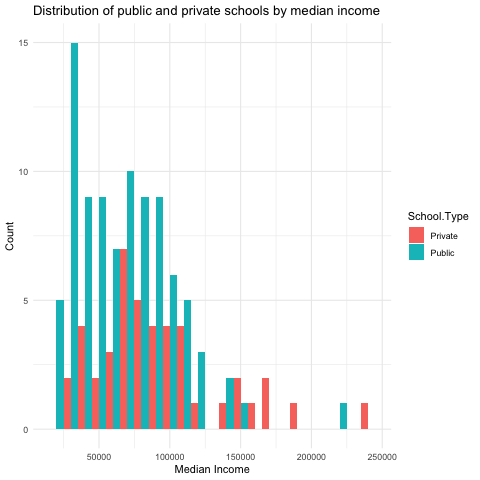

In [16]:
%%R
library(ggplot2)
library(dplyr) # Make sure to load the dplyr library for filtering

# Filter out rows where School.Type is NA, then make a histogram of median income for each school type
df %>%
  filter(!is.na(School.Type)) %>% # This line excludes rows with NA in School.Type
  ggplot(aes(x = med_inc, fill = School.Type)) +
  geom_histogram(binwidth = 10000, position = "dodge") +
  labs(title = "Distribution of public and private schools by median income",
       x = "Median Income",
       y = "Count") +
  theme_minimal()





R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 403 rows containing non-finite values (`stat_bin()`). 



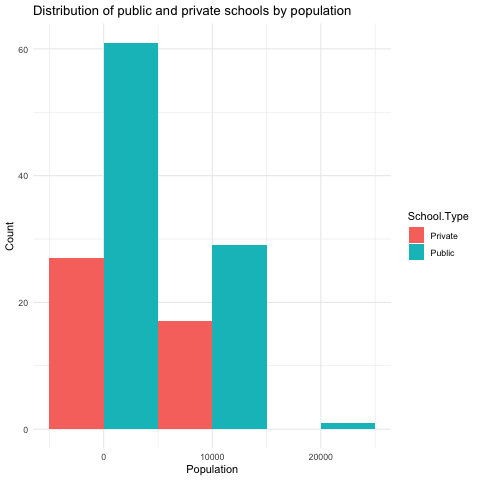

In [10]:

%%R
library(ggplot2)
library(dplyr) # Make sure to load the dplyr library for filtering

# Filter out rows where School.Type is NA, then make a histogram of population for each school type
df %>%
  filter(!is.na(School.Type)) %>% # This line excludes rows with NA in School.Type
  ggplot(aes(x = population, fill = School.Type)) +
  geom_histogram(binwidth = 10000, position = "dodge") +
  labs(title = "Distribution of public and private schools by population",
       x = "Population",
       y = "Count") +
  theme_minimal()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 451 rows containing missing values (`geom_point()`). 



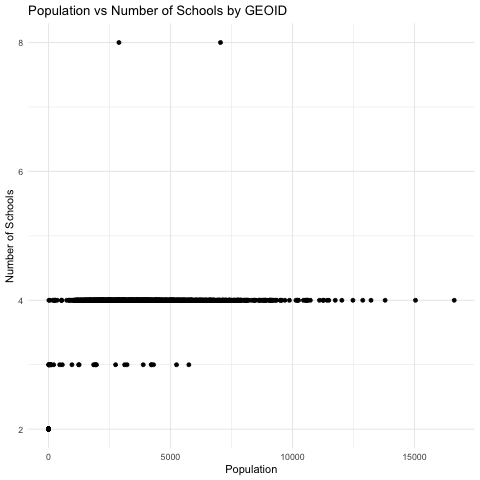

In [11]:
%%R
library(ggplot2)
library(dplyr)

# First, summarize to get the number of schools per GEOID
schools_per_geoid <- df %>%
  group_by(GEOID) %>%
  summarise(NumSchools = n(), 
            Population = first(population)) # Assuming population is constant per GEOID

# Now, plot population vs number of schools for each GEOID
ggplot(schools_per_geoid, aes(x = Population, y = NumSchools)) +
  geom_point() + # Using geom_point for dot plot
  labs(title = "Population vs Number of Schools by GEOID",
       x = "Population",
       y = "Number of Schools") +
  theme_minimal()


### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

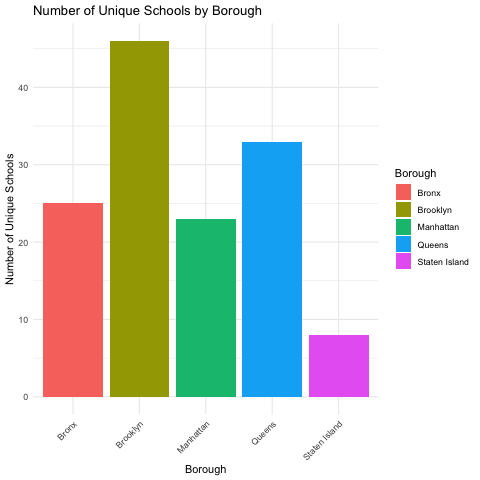

In [10]:
%%R
# code for plot 1
# make sure to make a meaningful title and subtitle
library(dplyr)
library(ggplot2)

# First, remove rows with NA values in 'Borough' or 'School.Name...ID'
df_clean <- df %>%
  filter(!is.na(Borough) & !is.na(School.Name...ID))

# Then, count unique schools within each borough
school_counts <- df_clean %>%
  group_by(Borough) %>%
  summarise(Unique_Schools = n_distinct(School.Name...ID)) %>%
  ungroup() # Ensure the data is no longer grouped for plotting

# Plot the number of unique schools by borough
ggplot(school_counts, aes(x = Borough, y = Unique_Schools, fill = Borough)) +
  geom_col() +
  theme_minimal() +
  labs(title = "Number of Unique Schools by Borough",
       x = "Borough",
       y = "Number of Unique Schools") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability


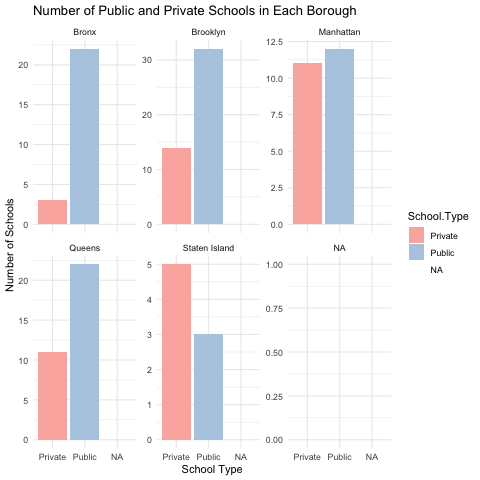

In [12]:

%%R

library(dplyr)
library(ggplot2)

# Assuming df is your dataframe and it's already been loaded into your R session
# Summarize the data to count the number of unique schools of each type in each Borough
schools_count <- df %>%
  group_by(Borough, School.Type) %>%
  summarise(Count = n_distinct(School.Name...ID), .groups = 'drop') # Explicitly counting distinct School.Name...ID

# Plot the data using ggplot2, with bars for each School.Type, faceted by Borough
ggplot(schools_count, aes(x = School.Type, y = Count, fill = School.Type)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~ Borough, scales = "free_y") +
  labs(title = "Number of Public and Private Schools in Each Borough",
       x = "School Type",
       y = "Number of Schools") +
  scale_fill_brewer(palette = "Pastel1") +
  theme_minimal()


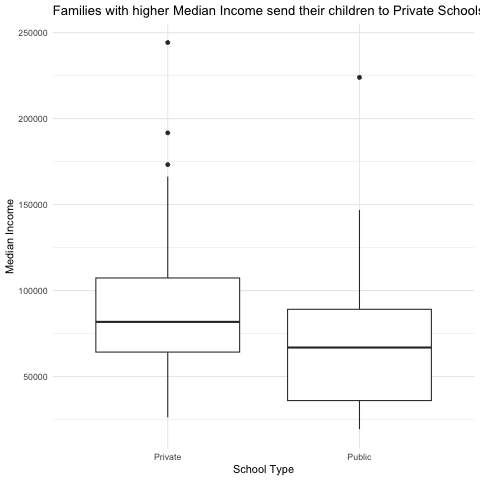

In [19]:
%%R
# Load the ggplot2 package
library(ggplot2)

# Remove rows with NA values in either 'med_inc' or 'School.Type' columns
df_clean <- na.omit(df[c("med_inc", "School.Type")])

# Create a boxplot
ggplot(df_clean, aes(x = School.Type, y = med_inc)) + 
  geom_boxplot() +
  theme_minimal() + 
  labs(title = "Families with higher Median Income send their children to Private Schools",
       x = "School Type",
       y = "Median Income")


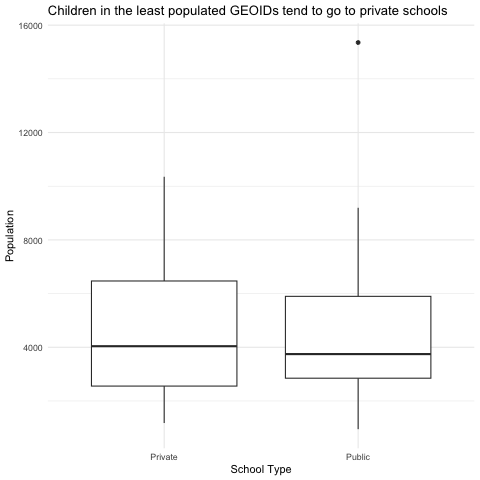

In [20]:
%%R
# Load the ggplot2 package
library(ggplot2)

# Remove rows with NA values in either 'med_inc' or 'School.Type' columns
df_clean <- na.omit(df[c("population", "School.Type")])

# Create a boxplot
ggplot(df_clean, aes(x = School.Type, y = population)) + 
  geom_boxplot() +
  theme_minimal() + 
  labs(title = "Children in the least populated GEOIDs tend to go to private schools",
       x = "School Type",
       y = "Population")

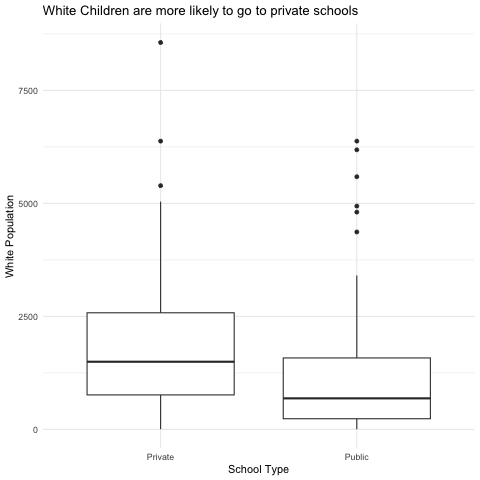

In [22]:
%%R
# Load the ggplot2 package
library(ggplot2)

# Remove rows with NA values in either 'med_inc' or 'School.Type' columns
df_clean <- na.omit(df[c("white_race", "School.Type")])

# Create a boxplot
ggplot(df_clean, aes(x = School.Type, y = white_race)) + 
  geom_boxplot() +
  theme_minimal() + 
  labs(title = "White Children are more likely to go to private schools",
       x = "School Type",
       y = "White Population")


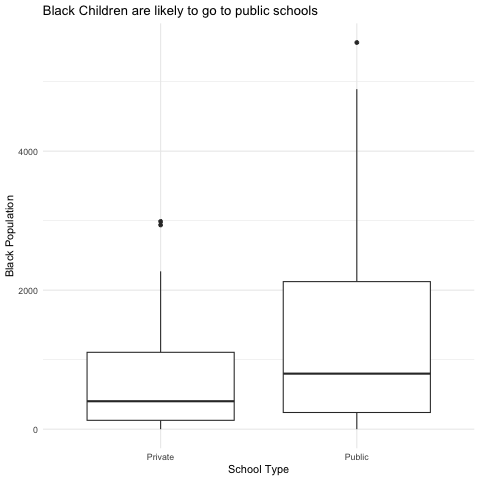

In [24]:
%%R
# Load the ggplot2 package
library(ggplot2)

# Remove rows with NA values in either 'med_inc' or 'School.Type' columns
df_clean <- na.omit(df[c("black_race", "School.Type")])

# Create a boxplot
ggplot(df_clean, aes(x = School.Type, y = black_race)) + 
  geom_boxplot() +
  theme_minimal() + 
  labs(title = "Black Children are likely to go to public schools",
       x = "School Type",
       y = "Black Population")


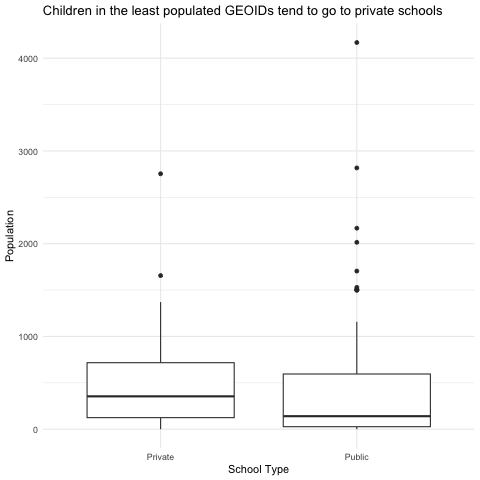

In [15]:
%%R
# Load the ggplot2 package
library(ggplot2)

# Remove rows with NA values in either 'med_inc' or 'School.Type' columns
df_clean <- na.omit(df[c("asian_race", "School.Type")])

# Create a boxplot
ggplot(df_clean, aes(x = School.Type, y = asian_race)) + 
  geom_boxplot() +
  theme_minimal() + 
  labs(title = "Children in the least populated GEOIDs tend to go to private schools",
       x = "School Type",
       y = "Population")
